In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import sys
import argparse
import os
import numpy as np
import pandas as pd
from numpy.random import uniform
import glob
%matplotlib inline

# %matplotlib notebook

In [2]:
location = "/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1_baseline_without_strengthen/"
folder_list = glob.glob(pathname=location + "*_")

In [3]:
location = folder_list[0] + "/simulation/0/0/"
i = 0

In [5]:
def read(location):
    file = "lipid.dat"
    lipid = pd.read_csv(location+file)
    lipid.columns = lipid.columns.str.strip()

    file = "energy.dat"
    energy = pd.read_csv(location+file)
    energy.columns = energy.columns.str.strip()
    file = "addforce.dat"
    dis = pd.read_csv(location+file)
    dis.columns = dis.columns.str.strip()
    remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
    file = "rgs.dat"
    rgs = pd.read_csv(location+file)
    rgs.columns = rgs.columns.str.strip()
    file = "wham.dat"
    wham = pd.read_csv(location+file)
    wham.columns = wham.columns.str.strip()
    remove_columns = ['Rg', 'Tc']
    wham = wham.drop(remove_columns, axis=1)
    data = wham.merge(rgs, how='inner', left_on=["Steps"], right_on=["Steps"]).\
        merge(dis, how='inner', left_on=["Steps"], right_on=["Steps"]).\
        merge(energy, how='inner', left_on=["Steps"], right_on=["Steps"]).\
        merge(lipid, how='inner', left_on=["Steps"], right_on=["Steps"])
    data = data.assign(TotalE = data.Energy + data.Lipid)
    return data

In [9]:
location = "/Users/weilu/Research/server/nov_2017/06nov/my_configue/study/recompute_offset_0/"
data = read(location)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov08_2.feather")

In [20]:
all_data_list = []
location_list = ["next_gen_lipid_distance"]
pre = "/Users/weilu/Research/server/nov_2017/06nov/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/*_")
    for folder in folder_list:
        print(folder)
        for i in range(5):
            data = read(folder + "/simulation/{}/0/".format(i))
            tmp = folder.split("/")[-1]
#             _,temp,_,memb,_,rg, _ = tmp.split("_")
            data = data.assign(Run = i, folder=tmp)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov10_lipid_distance.feather")

/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.61_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.2_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.8_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.8_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_1.6_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.4_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.42_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_1.2_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.58_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_1.0_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.71_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.3_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_d

In [25]:
all_data_list = []
location_list = ["next_gen_lipid_distance"]
pre = "/Users/weilu/Research/server/nov_2017/06nov/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/rg_*_")
    for folder in folder_list:
        print(folder)
        for i in range(5):
            data = read(folder + "/simulation/{}/0/".format(i))
            tmp = folder.split("/")[-1]
#             _,temp,_,memb,_,rg, _ = tmp.split("_")
            data = data.assign(Run = i, folder=tmp)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov10_lipid_distance_rg.feather")

/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.2_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.8_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_1.61_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.11_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_1.6_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.4_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.81_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.21_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.41_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.1_


In [34]:
all_data_list = []
location_list = ["next_gen_lipid_distance"]
pre = "/Users/weilu/Research/server/nov_2017/06nov/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/pressure_*_")
    for folder in folder_list:
        print(folder)
        for i in range(5):
            data = read(folder + "/simulation/{}/0/".format(i))
            tmp = folder.split("/")[-1]
            pressure = tmp.split("_")[1]
            rg = tmp.split("_")[3]
#             _,temp,_,memb,_,rg, _ = tmp.split("_")
            data = data.assign(Run = i, folder=tmp, pressure=pressure, rgsize=rg)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov10_lipid_distance_pressure.feather")

/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_2.0_rg_0.4_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_2.0_rg_0.2_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_2.0_rg_0.3_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_0.8_rg_0.4_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_0.8_rg_0.2_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_2.0_rg_0.1_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_0.8_rg_0.3_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_0.8_rg_0.1_


In [36]:
all_data_list = []
location_list = ["next_gen_lipid_distance"]
pre = "/Users/weilu/Research/server/nov_2017/06nov/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/tes*")
    for folder in folder_list:
        print(folder)
        for i in range(2):
            data = read(folder + "/recompute_offset_{}/".format(i))
#             _,temp,_,memb,_,rg, _ = tmp.split("_")
            data = data.assign(Run = i, folder=tmp)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov11_lipid_distance.feather")

/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/test


In [22]:
all_data_list = []
location_list = ["strengthen_helix_1", "strengthen_helix_1_baseline_without_strengthen"]
pre = "/Users/weilu/Research/server/oct_2017/30oct/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/*_")
    for folder in folder_list:
        print(folder)
        for i in range(10):
            data = read(folder + "/simulation/{}/0/".format(i), i)
            tmp = folder.split("/")[-1]
            _,temp,_,memb,_,rg, _ = tmp.split("_")
            data = data.assign(Run = i, temp = temp, memb = memb, rg = rg, Location=location)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov01_strengthen")

/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_350_memb_2_rg_0.1_


TypeError: read() takes 1 positional argument but 2 were given

In [67]:
all_data_list = []
location_list = ["strengthen_helix_1", "strengthen_helix_1_baseline_without_strengthen"]
pre = "/Users/weilu/Research/server/oct_2017/30oct/"
location = pre + "strengthen_helix_1_baseline_without_strengthen/temp_350_memb_2_rg_0.1_/simulation/0"
for i in range(-10, 15, 1):
    myLocation = location + "/recompute_offset_{}/".format(i)
    file = "lipid.dat"
    lipid = pd.read_csv(myLocation+file)
    lipid.columns = lipid.columns.str.strip()
    lipid = lipid.assign(Run = i)
    all_data_list.append(lipid)
data = pd.concat(all_data_list).reset_index()
tmp = data.query('Steps < 1e6')
results = tmp.filter(items=["Steps", "Run"] +["Lipid"+str(i) for i in range(1,16)]).groupby("Run").mean()


In [68]:
results

,Steps,Lipid1,Lipid2,Lipid3,Lipid4,Lipid5,Lipid6,Lipid7,Lipid8,Lipid9,Lipid10,Lipid11,Lipid12,Lipid13,Lipid14,Lipid15
Run,,,,,,,,,,,,,,,,
-10,498000,-4.390659,-4.525590,-4.172496,-4.483719,-4.261158,-4.389598,-4.047718,-4.369464,-4.318996,-4.171510,-4.503662,-4.451656,-4.152462,-4.104954,-4.431145
-9,498000,-4.390659,-4.525590,-4.171670,-4.427678,-3.977347,-4.389598,-4.047718,-4.369464,-4.318996,-4.171510,-4.503662,-4.451656,-4.152462,-4.104954,-4.431145
-8,498000,-4.390659,-4.525590,-4.161039,-4.296501,-3.566059,-4.389598,-4.047718,-4.369464,-4.318996,-4.171510,-4.503373,-4.451656,-4.152462,-4.104954,-4.431145
-7,498000,-4.390659,-4.525590,-4.087775,-4.047550,-3.065150,-4.389598,-4.047718,-4.369464,-4.318996,-4.171510,-4.499283,-4.451656,-4.152462,-4.104954,-4.431145
-6,498000,-4.390659,-4.525545,-3.880631,-3.675752,-2.509628,-4.389598,-4.047718,-4.369464,-4.318996,-4.171510,-4.465962,-4.451656,-4.152462,-4.104954,-4.431145
-5,498000,-4.390659,-4.524241,-3.540018,-3.203998,-1.929596,-4.389598,-4.047718,-4.369464,-4.318911,-4.171510,-4.336827,-4.451656,-4.152462,-4.104954,-4.431135
-4,498000,-4.390659,-4.513332,-3.099774,-2.666550,-1.350528,-4.389598,-4.047718,-4.369464,-4.314035,-4.171510,-4.058334,-4.451656,-4.152462,-4.104954,-4.428748
-3,498000,-4.390659,-4.439459,-2.594729,-2.095174,-0.793543,-4.389598,-4.047718,-4.369464,-4.264693,-4.171510,-3.647656,-4.451656,-4.152462,-4.104954,-4.408146
-2,498000,-4.390659,-4.222338,-2.055105,-1.516888,-0.275684,-4.386983,-4.047718,-4.369439,-4.082691,-4.171510,-3.143880,-4.451656,-4.152462,-4.104954,-4.318661


In [77]:
record = []
labels = []
for label, group in results.groupby('Run'):
    helix1 = 0 
    for i in range(1,6):
        helix1 += group["Lipid" +str(i)]
    helix6 = 0
    ii = 0
    for i in range(5,0,-1):
        ii = ii + i
#         print(ii)
        helix6 += group["Lipid" +str(ii)]
    print(float(helix1 - helix6))
    record.append(helix1 - helix6)
    labels.append(label)


-0.26571287066953886
-0.20884646272050844
-0.06703866210396114
0.25517746309661504
0.8341638202453616
1.6477403616257078
2.629078954927973
3.7094264485288146
4.772971698257146
5.698032719479286
6.436171083599824
6.990803305576783
7.40727953443701
7.793466090217336
8.162386551259145
8.413521504449458
8.464644538339973
8.256872144017407
7.747514885478445
6.9948993735737455
6.066849763733545
5.025486292920007
3.927151047958733
2.8223902089395105
1.7559362926168056


In [78]:
record = [float(i) for i in record]

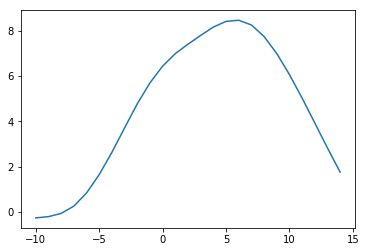

In [79]:
plt.plot(labels, record)

In [ ]:
helix1 = 0 
for i in range(1,6):
    helix1 += results["Lipid" +str(i)]

helix6 = 0
ii = 0
for i in range(5,0,-1):
    ii = ii + i
    print(ii)
    helix6 += results["Lipid" +str(ii)]

helix1 - helix6

In [48]:
all_data_list = []
location_list = ["strengthen_helix_1", "strengthen_helix_1_baseline_without_strengthen"]
pre = "/Users/weilu/Research/server/oct_2017/30oct/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/*_")
    for folder in folder_list:
        print(folder)
        for i in range(10):
            myLocation = folder + "/simulation/{}/recompute_offset_0/".format(i)
            
            file = "lipid.dat"
            lipid = pd.read_csv(myLocation+file)
            lipid.columns = lipid.columns.str.strip()
            tmp = folder.split("/")[-1]
            _,temp,_,memb,_,rg, _ = tmp.split("_")
            lipid = lipid.assign(Run = i, temp = temp, memb = memb, rg = rg, Location=location)
            all_data_list.append(lipid)
data = pd.concat(all_data_list).reset_index()
tmp = data.query('Location=="strengthen_helix_1_baseline_without_strengthen"').query('Steps < 1e6')
results = tmp.filter(items=["Steps"] +["Lipid"+str(i) for i in range(1,16)]).mean()
helix1 = 0 
for i in range(1,6):
    helix1 += results["Lipid" +str(i)]

helix6 = 0
ii = 0
for i in range(5,0,-1):
    ii = ii + i
    print(ii)
    helix6 += results["Lipid" +str(ii)]

helix1 - helix6

/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_350_memb_2_rg_0.1_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_350_memb_4_rg_0.4_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_500_memb_2_rg_0.1_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_350_memb_2_rg_0.4_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_500_memb_4_rg_0.4_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_500_memb_4_rg_0.1_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_500_memb_2_rg_0.4_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_350_memb_4_rg_0.1_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1_baseline_without_strengthen/temp_350_memb_2_rg_0.1_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1_baseline_without_strengthen/temp_350_memb_4_rg_0.4_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1_baseline_wi

1.9499850149169937

In [54]:
tmp = data.query('Location=="strengthen_helix_1_baseline_without_strengthen"').query('Steps < 1e6').query('temp=="350"')
tmp =tmp.query('rg=="0.1"').query('memb=="2"')


results = tmp.filter(items=["Steps"] +["Lipid"+str(i) for i in range(1,16)]).mean()
helix1 = 0 
for i in range(1,6):
    helix1 += results["Lipid" +str(i)]

helix6 = 0
ii = 0
for i in range(5,0,-1):
    ii = ii + i
    print(ii)
    helix6 += results["Lipid" +str(ii)]

helix1 - helix6

5
9
12
14
15


1.6297487072661312

In [55]:
# offset -5
helix1 - helix6

1.6297487072661312

In [47]:
# offset -2
helix1 - helix6

4.932207833357694

In [45]:
# offset -1 
helix1 - helix6

5.8028303110838184

In [43]:
# offset 0
helix1 - helix6

6.321547949765721